In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

import altair as alt
from vega_datasets import data

import plotly_express as px
import math
import plotly
import seaborn as sns

olympics = pd.read_csv('data/athlete_events.csv') 
region = pd.read_csv('data/noc_regions.csv')

# TRENDS OVER THE YEARS 


## Participation by Gender 

# How many women participated? 

Make subset of the data that is just women

In [2]:
f = olympics['Sex'] == "F"
female = olympics[f]

In [3]:
female.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN


In [4]:
female_participation = female.groupby(["Year"])["ID"].count()

No women participated until 1900. For the first 10 years of the Olympics, women did not participate. 

In [5]:
female_participation

Year
1900      33
1904      16
1906      11
1908      47
1912      87
1920     134
1924     261
1928     437
1932     369
1936     549
1948     761
1952    1682
1956    1139
1960    1730
1964    1752
1968    2193
1972    2608
1976    2606
1980    2186
1984    2983
1988    4223
1992    5178
1994    1105
1996    5008
1998    1384
2000    5431
2002    1582
2004    5546
2006    1757
2008    5816
2010    1847
2012    5815
2014    2023
2016    6223
Name: ID, dtype: int64

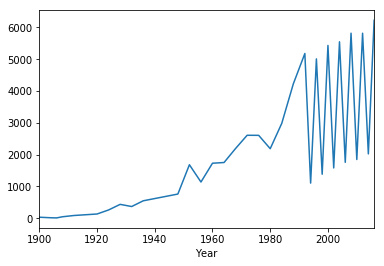

In [6]:
female_participation.plot()

In [7]:
female["ID"].count()

74522

In [8]:
female_participation.count()

34

Female have participated in 34 games 

## Compare to men 

Make a subset of male athletes 

In [9]:
m = olympics['Sex'] == "M"
male = olympics[m]

Find the number of athletes that were male per year

In [10]:
male_participation = male.groupby(["Year"])["ID"].count()

In [11]:
male_participation

Year
1896      380
1900     1903
1904     1285
1906     1722
1908     3054
1912     3953
1920     4158
1924     5432
1928     5137
1932     2952
1936     6852
1948     6719
1952     7676
1956     5295
1960     7505
1964     7728
1968     8286
1972     9351
1976     7896
1980     6751
1984     8605
1988    10453
1992    11235
1994     2055
1996     8772
1998     2221
2000     8390
2002     2527
2004     7897
2006     2625
2008     7786
2010     2555
2012     7105
2014     2868
2016     7465
Name: ID, dtype: int64

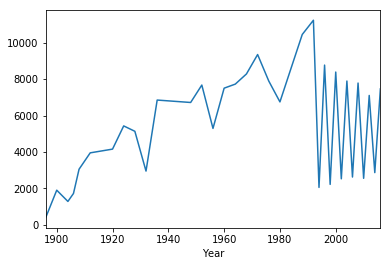

In [12]:
male_participation.plot()

In [13]:
participation_by_sex = pd.merge(male_participation, female_participation, on = 'Year')

Plot both together male and female participation 

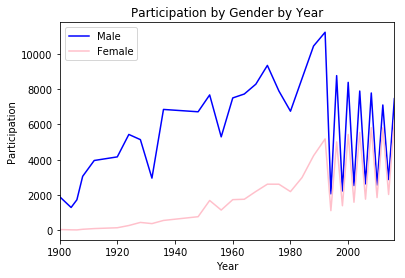

In [14]:
gender = participation_by_sex.plot(color = ["blue", "pink"])
plt.title("Participation by Gender by Year")
plt.ylabel("Participation") 
plt.legend(['Male', 'Female'])

In [15]:
gender.savefig = ('gender.png')

## Countries Participation 

### Look at number of countries that participate throughout the years 

In [16]:
num_country = olympics.groupby(["Year"])["NOC"].nunique()

In [17]:
num_country.head()

Year
1896    12
1900    31
1904    15
1906    21
1908    22
Name: NOC, dtype: int64

Make a plot of this 

Text(0, 0.5, 'Number of Countries')

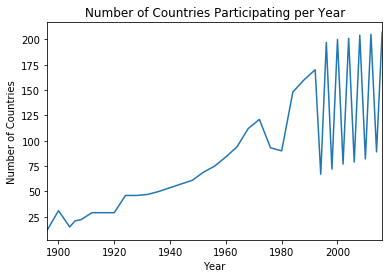

In [18]:
fig = num_country.plot()
plt.title("Number of Countries Participating per Year")
plt.ylabel("Number of Countries")

In [19]:
fig.savefig = ('country.png')

Find the size of each countries team 

Aggregate by year and country

In [20]:
NOC_team_size = olympics.groupby(['Year', 'NOC']).agg({'ID': ["count"]})

In [21]:
NOC_team_size.head()

ID
         count
Year NOC      
1896 AUS     5
     AUT     8
     DEN    15
     FRA    26
     GBR    25

Find minimum and maximum

In [22]:
NOC_team_size.max()

ID  count    1109
dtype: int64

In [23]:
NOC_team_size.min()

ID  count    1
dtype: int64

#### Find medal count of each country 

In [24]:
NOC_medal_count = olympics.groupby(['Year', 'NOC']).agg({'Medal': ["count"]})
NOC_medal_count_df = pd.DataFrame(NOC_medal_count)

In [25]:
NOC_medal_count_df.head()

Medal
         count
Year NOC      
1896 AUS     3
     AUT     5
     DEN     6
     FRA    11
     GBR     9

Find the country with the largest medal count by year

In [26]:
count = NOC_medal_count_df.groupby(["Year"]).max()
country = NOC_medal_count_df.groupby(["Year"]).idxmax()

Merge together the count and the country, make a cleaner country variable

In [27]:
top_country = pd.merge(count, country, on = "Year")
top_country["country"] = ["GRE", "FRA", "USA", "GRE", "GBR", "SWE", "USA", 
                          "USA", "USA", "USA", "GER", "USA", "USA",
                         "URS", "URS", "URS", "URS", "URS", "USR", "USR", "USA", "USR", "EUN", "GER", "USA",
                         "FIN", "USA", "USA", "USA", "CAN", "USA", "USA", "USA", "CAN", "USA"]
top_country.head()

,Medal_x,Medal_y,country
,count,count,
Year,,,
1896,48,"(1896, GRE)",GRE
1900,235,"(1900, FRA)",FRA
1904,394,"(1904, USA)",USA
1906,102,"(1906, GRE)",GRE
1908,368,"(1908, GBR)",GBR


Make a plot of the top medal earners by year

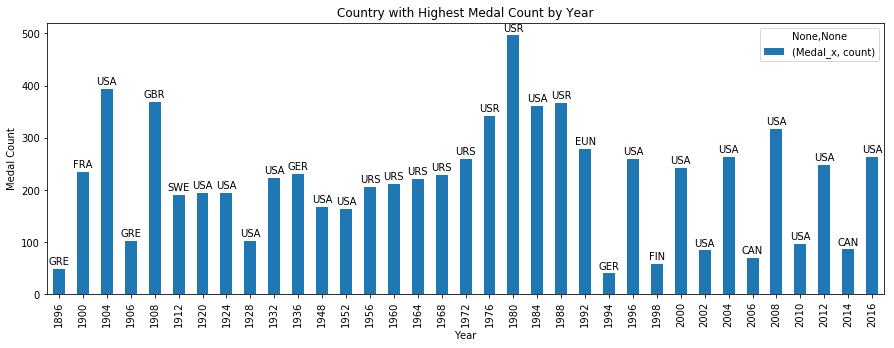

In [29]:
ax = top_country.plot.bar(figsize = (15,5))
ax.set_title("Country with Highest Medal Count by Year")
ax.set_ylabel("Medal Count")
width = 100
# Create labels
labels = ["GRE", "FRA", "USA", "GRE", "GBR", "SWE", "USA", 
        "USA", "USA", "USA", "GER", "USA", "USA",
         "URS", "URS", "URS", "URS", "URS", "USR", "USR", "USA", "USR", "EUN", "GER", "USA",
         "FIN", "USA", "USA", "USA", "CAN", "USA", "USA", "USA", "CAN", "USA"]

rects = ax.patches
## add country labels to the graph
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
ax.savefig = ('medalcount.png')

### Merge medal count and team size datasets together  

In [30]:
NOC_size_medal_count = pd.merge(NOC_team_size, NOC_medal_count, on = ["NOC", "Year"])

In [31]:
NOC_size_medal_count.head()

,,ID,Medal
,,count,count
NOC,Year,,
AUS,1896,5,3
AUT,1896,8,5
DEN,1896,15,6
FRA,1896,26,11
GBR,1896,25,9


Create a scatter plot to look at the correlation between the team size and medal count

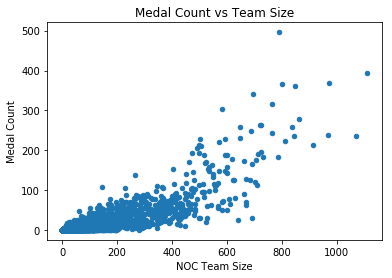

In [32]:
cor = NOC_size_medal_count.plot.scatter(x = "ID", y = "Medal")
plt.title("Medal Count vs Team Size")
plt.xlabel("NOC Team Size")
plt.ylabel("Medal Count")
cor.savefig = ('corr.jpeg')

Look at the correlation 

In [33]:
NOC_size_medal_count[['ID','Medal']].corr()

,,ID,Medal
,,count,count
ID,count,1.000000,0.840982
Medal,count,0.840982,1.000000


There is a decently strong positive correlation between team size and medal performance. 

### COMPARE SUMMER TO WINTER GAMES 

Make a subset of winter and summer games 

In [34]:
summer = olympics["Season"] == "Summer"
summer_games = olympics[summer]
summer_games.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [35]:
winter = olympics["Season"] == "Winter"
winter_games = olympics[winter]
winter_games.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


### Find the number of countries participating in each year

In [36]:
num_country_summer = summer_games.groupby(["Year"])["NOC"].nunique()
num_country_summer.head()

Year
1896    12
1900    31
1904    15
1906    21
1908    22
Name: NOC, dtype: int64

In [37]:
num_country_winter = winter_games.groupby(["Year"])["NOC"].nunique()
num_country_winter.head()

Year
1924    19
1928    25
1932    17
1936    28
1948    28
Name: NOC, dtype: int64

Merge together the number of countries participating in each game 

In [38]:
participation_by_season = pd.merge(num_country_summer, num_country_winter, on = "Year", how = "outer")
participation_by_season.tail()

,NOC_x,NOC_y
Year,,
1998,NaN,72.0
2002,NaN,77.0
2006,NaN,79.0
2010,NaN,82.0
2014,NaN,89.0


Create a plot 

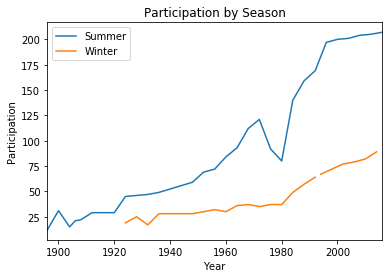

In [39]:
season = participation_by_season.plot()
plt.title("Participation by Season")
plt.ylabel("Participation")
plt.legend(['Summer', 'Winter'])
season.savefig = ('season.png')

Find the number of sports played in each game 

In [40]:
num_sports_summer = summer_games.groupby('Year')["Sport"].count()
num_sport_winter = winter_games.groupby("Year")["Sport"].count()

Create a plot

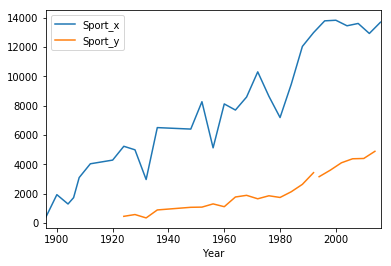

In [41]:
sport_by_season = pd.merge(num_sports_summer, num_sport_winter, on = "Year", how = "outer")
sport_by_season.plot()

## SPORTS

Going to determine popularity of sports based on the amount of countries that participated in each 

In [42]:
sport_count = olympics.groupby(['Year', 'Sport']).agg({'NOC': ["nunique"]})

In [43]:
sport_count

NOC
                           nunique
Year Sport                        
1896 Athletics                   9
     Cycling                     5
     Fencing                     4
     Gymnastics                  8
     Shooting                    7
     Swimming                    4
     Tennis                      6
     Weightlifting               5
     Wrestling                   4
1900 Archery                     3
     Athletics                  17
     Basque Pelota               1
     Cricket                     2
     Croquet                     1
     Cycling                     7
     Equestrianism               8
     Fencing                    19
     Football                    4
     Golf                        4
     Gymnastics                  8
     Polo                        4
     Rowing                      7
     Rugby                       5
     Sailing                     6
     Shooting                    8
     Swimming                   12
     Tennis                      4
     Tug-Of-War                  4
     Water Polo                  5
1904 Archery                     1
...                            ...
2016 Beach Volleyball           24
     Boxing                     76
     Canoeing                   54
     Cycling                    79
     Diving                     29
     Equestrianism              43
     Fencing                    47
     Football                   23
     Golf                       41
     Gymnastics                 60
     Handball                   20
     Hockey                     16
     Judo                      136
     Modern Pentathlon          28
     Rhythmic Gymnastics        24
     Rowing                     69
     Rugby Sevens               14
     Sailing                    66
     Shooting                   97
     Swimming                  173
     Synchronized Swimming      24
     Table Tennis               56
     Taekwondo                  62
     Tennis                     56
     Trampolining               17
     Triathlon                  42
     Volleyball                 19
     Water Polo                 14
     Weightlifting              92
     Wrestling                  66

[906 rows x 1 columns]

Case study: tug-of-war

In [44]:
tug_of_war = olympics[olympics["Sport"] == "Tug-Of-War"]

See how many years tug of war was an Olympic sport

In [45]:
tug_of_war.groupby('Year').count()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
Year,,,,,,,,,,,,,,
1900,12,12,12,11,0,0,12,12,12,12,12,12,12,12
1904,30,30,30,13,4,4,30,30,30,30,30,30,30,15
1906,32,32,32,20,10,7,32,32,32,32,32,32,32,24
1908,40,40,40,37,9,24,40,40,40,40,40,40,40,24
1912,16,16,16,16,0,3,16,16,16,16,16,16,16,16
1920,40,40,40,29,2,14,40,40,40,40,40,40,40,24


Look at the overall trend of number of sports played throughout the years 

In [46]:
num_sports = olympics.groupby("Year")["Sport"].count()

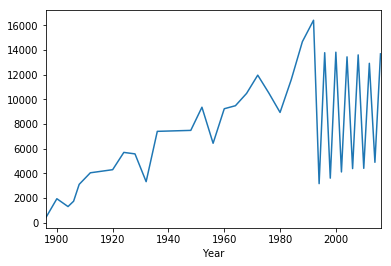

In [47]:
num_sports.plot()